In [16]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [17]:
n = 40
theta_tar = 15
delta = 15
N = 400

PI = np.pi

# Convert values to radians
theta_tar = np.deg2rad(theta_tar)
delta = np.deg2rad(delta)

In [18]:
np.random.seed(0)
x = 30 * np.random.rand(n,1)
y = 30 * np.random.rand(n,1)

In [19]:
def gamma(theta, x=x, y=y):
    return x*np.cos(theta)+y*np.sin(theta)

In [20]:
thetas = np.linspace(-PI, PI, N)        # generate N sampled points in range [-PI, PI]
theta_ks = thetas[np.abs(thetas-theta_tar)>delta]   # obtain sample points outside beamwidth

gamma_ks = gamma(theta_ks)      # gamma values for the corresponding angles
exp = np.exp(1j*gamma_ks)       # calculate complex exponential of gamma

In [21]:
w = cp.Variable((n),complex=True)

objective = cp.Minimize(cp.norm(exp.T @ w, 'inf'))
constraints = [np.exp(1j*gamma(theta_tar)).T @ w == 1]

prob = cp.Problem(objective, constraints)
result = prob.solve(solver=cp.ECOS)

w_sol = w.value

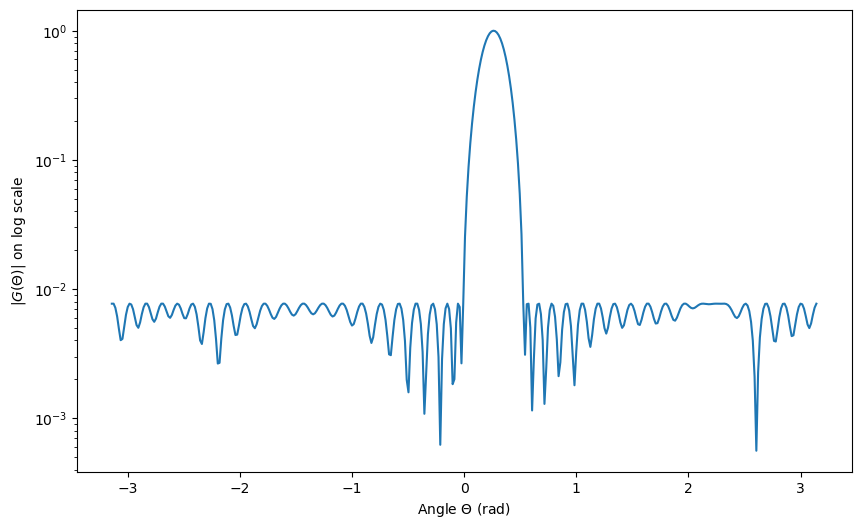

In [22]:
G_thetas = np.abs(np.exp(1j*gamma(thetas)).T @ w_sol)

plt.figure(figsize=(10,6))
plt.plot(thetas, G_thetas)
plt.yscale("log")
plt.xlabel("Angle $\Theta$ (rad)")
plt.ylabel("$|G(\Theta)|$ on log scale")
plt.show()

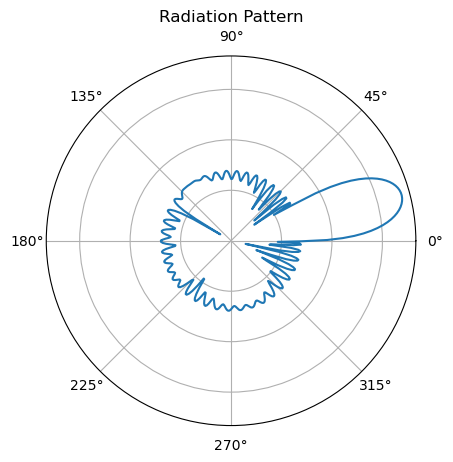

In [23]:
dB_offset = 3.5
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(thetas, np.log10(G_thetas)+dB_offset)
ax.grid(True)
ax.set_rticks([1, 2, 3], labels=["", "", ""])

ax.set_title("Radiation Pattern")
plt.show()